### Problem 2 Part 1

##### Load the Mona Lisa image (in grayscale) and treat it as a matrix M. Perform a singular value decomposition on this matrix using linalg.svd. You can perform a low-rank approximation by zeroing out singular values and keeping only the top k. Show the best rank k = 2, k = 5 and k = 10 approximation to Mona Lisa.

In [24]:
import numpy as np
from PIL import Image


#we use pillow library to load image and use L flag in convert method to load it as grayscale
img=Image.open('mona_lisa.png').convert('L')
img=np.array(img)

In [25]:
#used linalg.svd for creating matrices
U, s, Vh = np.linalg.svd(img)
U

array([[-0.05333248,  0.01837301, -0.00313251, ..., -0.02452766,
        -0.00322816, -0.01879932],
       [-0.05404077,  0.02038671, -0.00444508, ...,  0.03214271,
        -0.00149521,  0.02921036],
       [-0.05426541,  0.01976151, -0.00483247, ...,  0.0073675 ,
        -0.01910996, -0.00122704],
       ...,
       [-0.00611594,  0.00135834,  0.00290904, ...,  0.83054248,
        -0.01871703, -0.01090291],
       [-0.00619802,  0.00124736,  0.00358037, ..., -0.03105269,
         0.84880511, -0.04056196],
       [-0.00631259,  0.00147244,  0.003386  , ...,  0.00314428,
        -0.03120748,  0.83116889]])

number of components: 2 & number of pixels is 2008


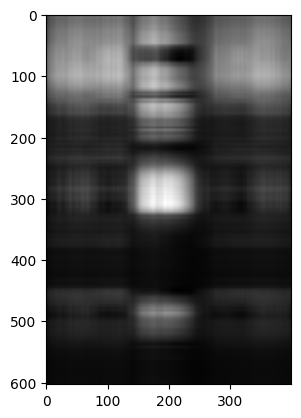

This iteration took (for k value= 2 )  0.24650600000001077
---------------------------------------------------------------
number of components: 5 & number of pixels is 5020


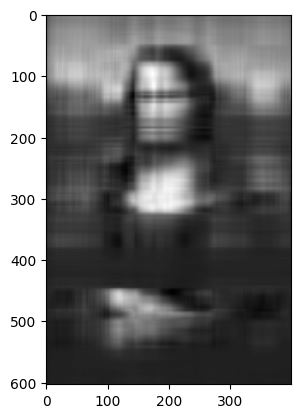

This iteration took (for k value= 5 )  0.27399400000001606
---------------------------------------------------------------
number of components: 10 & number of pixels is 10040


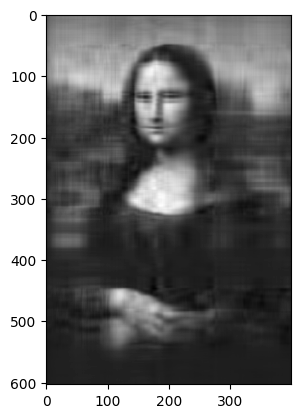

This iteration took (for k value= 10 )  0.2903529999999819
---------------------------------------------------------------
number of components: 30 & number of pixels is 30120


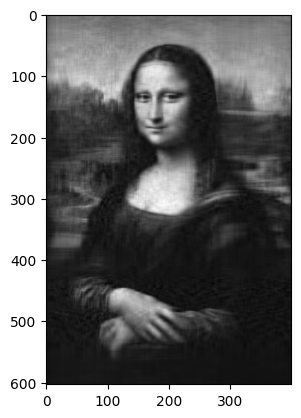

This iteration took (for k value= 30 )  0.3216809999999555
---------------------------------------------------------------
number of components: 100 & number of pixels is 100400


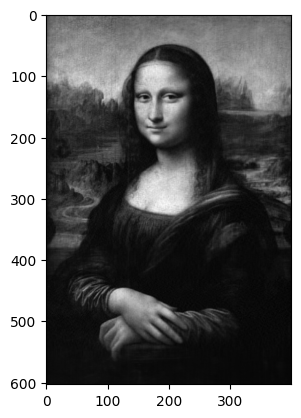

This iteration took (for k value= 100 )  0.42646400000000995
---------------------------------------------------------------
number of components: 399 & number of pixels is 400596


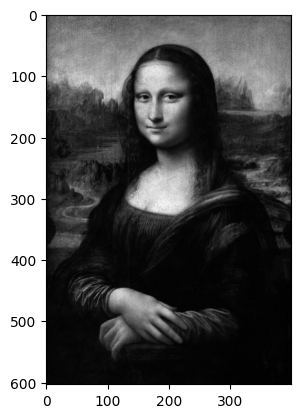

This iteration took (for k value= 399 )  0.8233109999999897
---------------------------------------------------------------


In [45]:
import time
from matplotlib import pylab


#the prompt asked for k value 2,5 and 10 but we are also testing with 30, 100 and 399 to evaluate
# tradeoff in quality
kvals = [2,5,10,30,100,399]
pylab.figure()
pylab.ion()
for i in kvals:
    start = time.process_time()
    Ar = np.zeros((len(U), len(Vh)))
    for x in range(i):
        Ar += s[x] * np.outer(U.T[x], Vh[x])
    pylab.imshow(Ar, cmap=pylab.cm.gray)
    pylab.draw()
    print('number of components: '+str(i)+' & number of pixels is '+ str(i*603+i+i*400))

    pylab.show()
    print('This iteration took (for k value=',i,') ',time.process_time() - start)
    print('---------------------------------------------------------------')

##### As we can observe as we increase the value of k (number of components) we increase the iteration time as well

### Problem 2 Part 2

In [42]:
for i in kvals:
    print('for k value '+str(i)+ " approximation is "
+ str((i*603+i+i*400)*2) + " in bytes and  " + str((((i*603+i+i*400)*2)*8)) + " in bits.")

for k value 2 approximation is 4016 in bytes and  32128 in bits.
for k value 5 approximation is 10040 in bytes and  80320 in bits.
for k value 10 approximation is 20080 in bytes and  160640 in bits.
for k value 30 approximation is 60240 in bytes and  481920 in bits.
for k value 100 approximation is 200800 in bytes and  1606400 in bits.
for k value 399 approximation is 801192 in bytes and  6409536 in bits.
